<a href="https://colab.research.google.com/github/RofiqAulia/PCVK_Ganjil_2024/blob/main/PCVKJS7_ObjekDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/PCVK/Images/cat2_templatejpg.jpg')

(<matplotlib.image.AxesImage at 0x7f4a3c6cca30>,
 Text(0.5, 1.0, 'template image'))

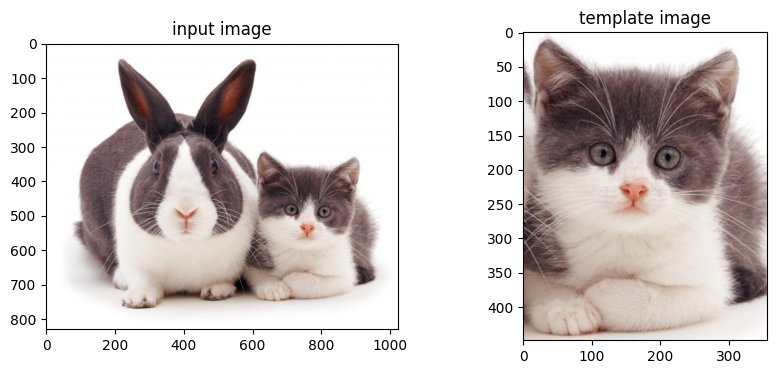

In [ ]:
# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(10,4)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB)), axarr[1].set_title("template image")

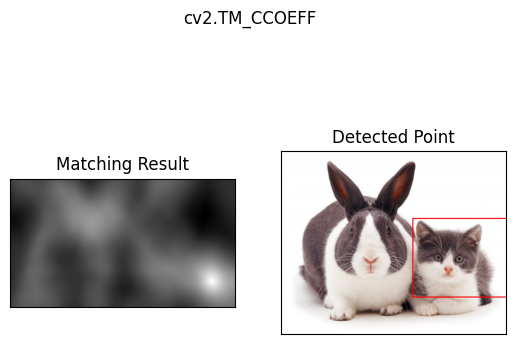

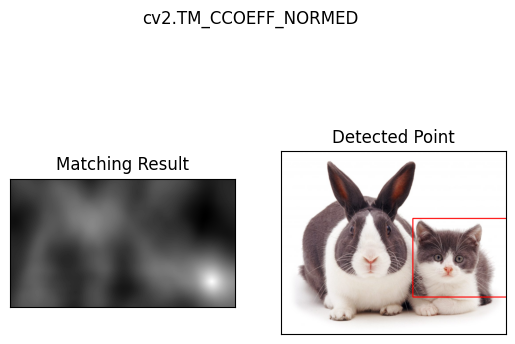

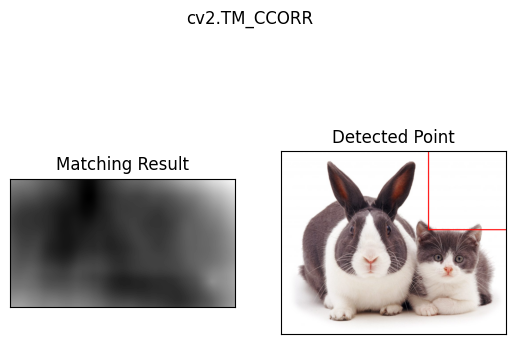

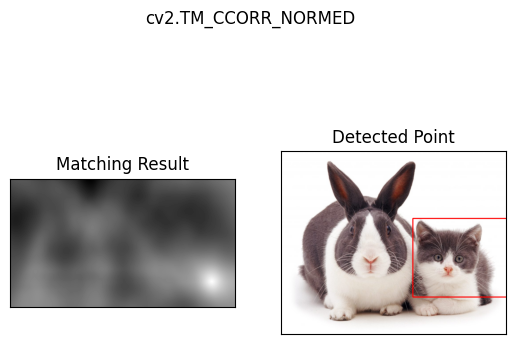

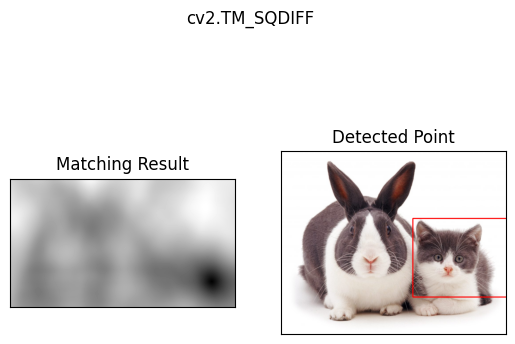

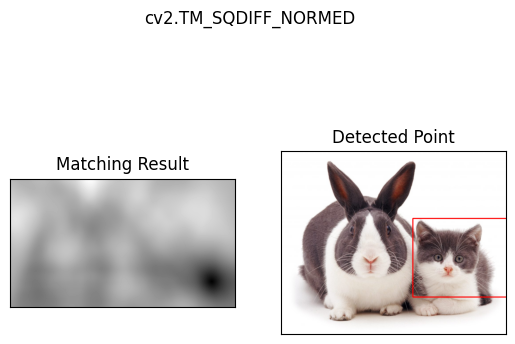

In [ ]:
img2 = main_image.copy()
w, h = template.shape[:-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, (0, 0, 255), 3)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut

In [ ]:
# Load the input image and template
main_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/bahrain.jpg', 0)
template = cv2.imread('/content/drive/MyDrive/PCVK/Images/bahrain-template.jpg', 0)

(<matplotlib.image.AxesImage at 0x7f4a3ebe8eb0>,
 Text(0.5, 1.0, 'template image'))

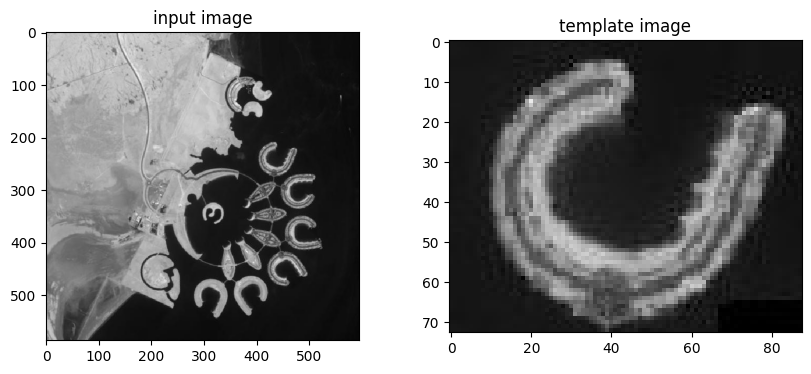

In [ ]:
# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(10,4)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB)), axarr[1].set_title("template image")

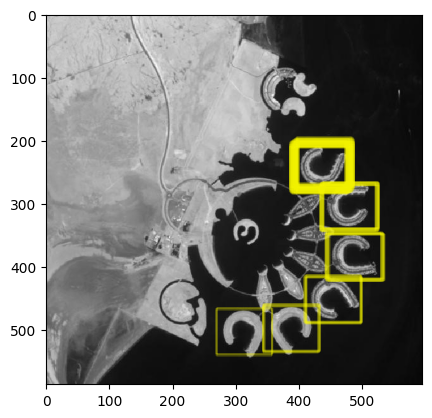

In [ ]:
# library untuk mencocokkan beberapa gambar yang sama
from skimage.feature import match_template

# Hitung kemiripan citra dengan citra template
result = match_template(main_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45 # menentukan threshold untuk menentukan hasil matc
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(main_image, cmap=plt.cm.gray)
# ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut

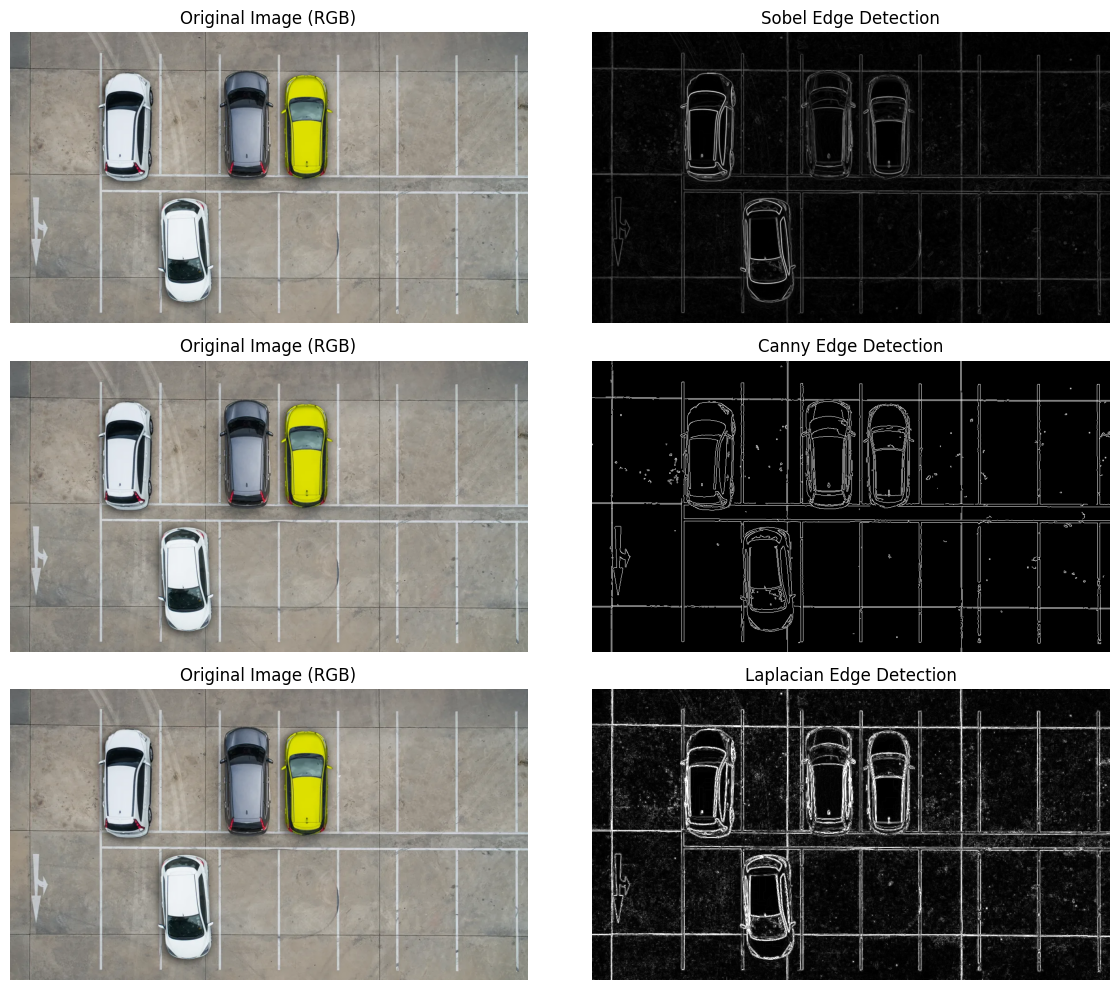

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the original image in RGB
image_rgb = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/PCVK/Images/car-park.jpg'), cv2.COLOR_BGR2RGB)

# Convert the RGB image to grayscale for edge detection
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Apply Sobel Edge Detection
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Apply Canny Edge Detection
canny_edge = cv2.Canny(image_gray, 100, 200)

# Apply Laplacian Edge Detection and convert to 8-bit for better visualization
laplacian_edge = cv2.Laplacian(image_gray, cv2.CV_64F, ksize=3)
laplacian_edge = cv2.convertScaleAbs(laplacian_edge)

# Plot the results side-by-side in rows
plt.figure(figsize=(12, 10))

# Row 1: Original RGB Image and Sobel Edge Detection
plt.subplot(3, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

# Row 2: Original RGB Image and Canny Edge Detection
plt.subplot(3, 2, 3)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Row 3: Original RGB Image and Laplacian Edge Detection
plt.subplot(3, 2, 5)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(laplacian_edge, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

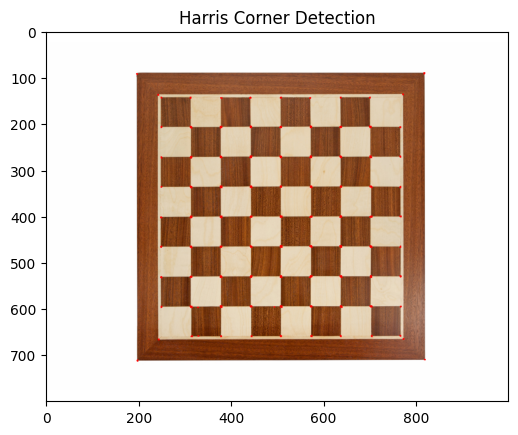

In [ ]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/chess-board.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate the result for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the input image with the detected corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()

<ipython-input-51-360a1883cbc4>:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


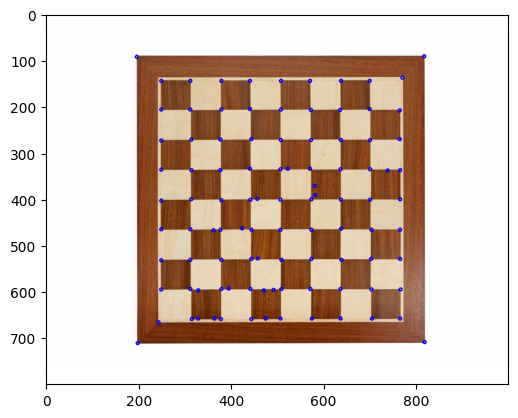

In [ ]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/chess-board.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Draw circles around the corners
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, 2)

# Display the input image with the detected corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


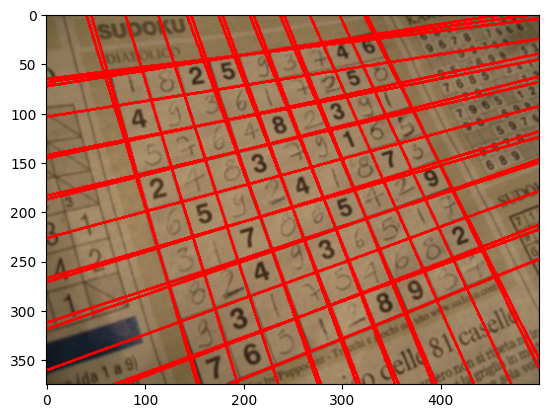

In [ ]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/sudoku.jpg')
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv2.erode(edges, kernel, iterations=1)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

if lines is None or not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    # Draw the detected lines on the input image
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the input image with the detected lines
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut

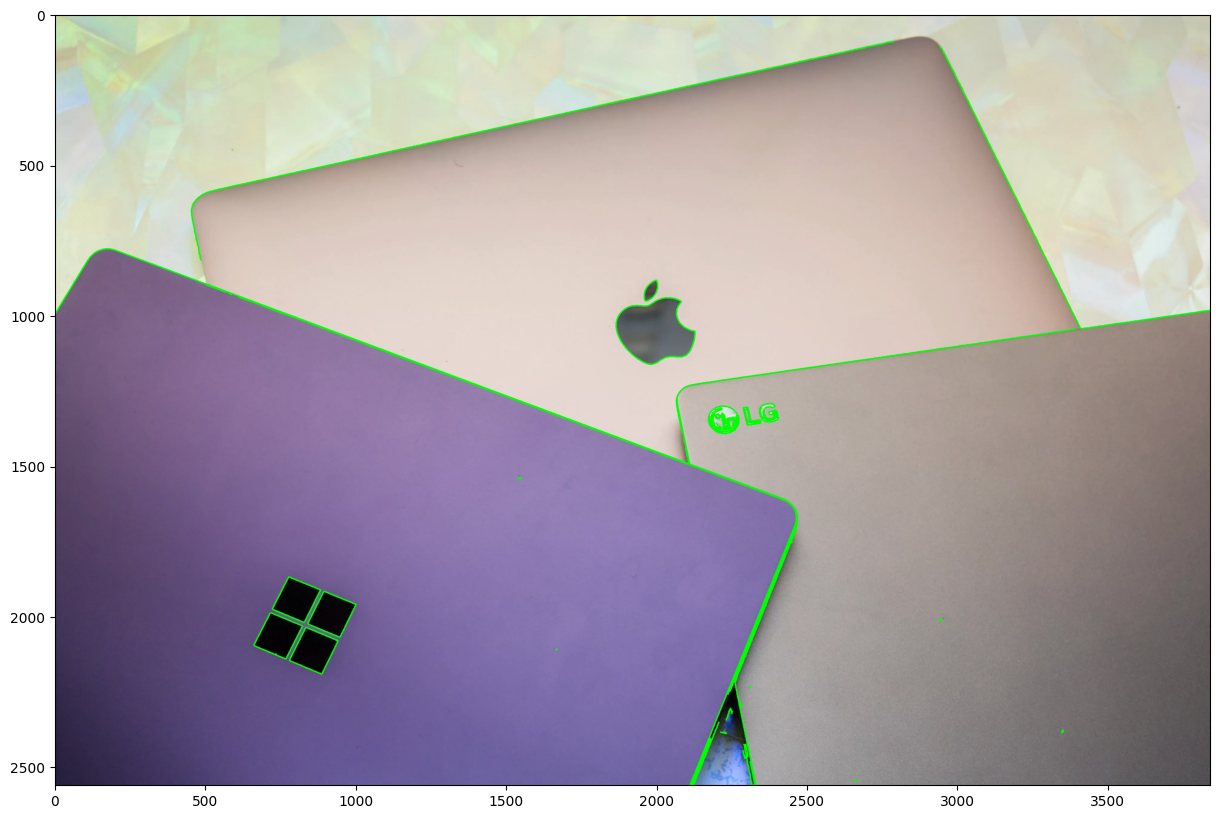

In [ ]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/laptop.jpg')
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 200, apertureSize=3)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Display the input image with the detected contours
plt.figure(figsize=(20,10))
plt.imshow(img)

Pengayaan Materi KTP

1. Import Library

In [ ]:
import cv2
import os

2. Load data

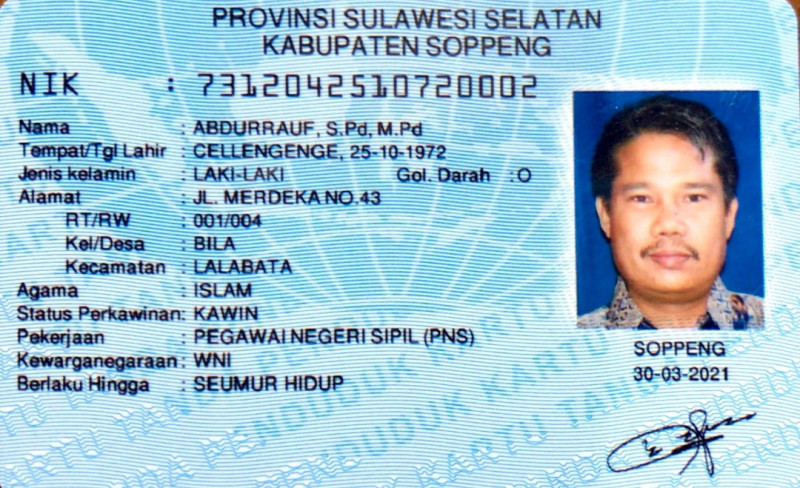

In [63]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')
cv2_imshow(ktp)

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut


In [64]:
# Lokasi hasil pelat
path_plate = '/content/drive/MyDrive/PCVK/Images' # Check and correct this path

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    # Check if the file is an image file before attempting to read it
    if name_file.endswith(('.jpeg')):  # Add other supported extensions if needed
        src = cv2.imread(os.path.join(path_plate, name_file))

        # Check if the image was loaded successfully
        if src is not None:
            blurred = src.copy()
            gray = blurred.copy()
            # ... (rest of your code) ...
        else:
            print(f"Failed to load image: {name_file}")
    else:
        print(f"Skipping non-image file: {name_file}")

Skipping non-image file: .ipynb_checkpoints
Skipping non-image file: animal-template.jpg
Skipping non-image file: animal.jpg
Skipping non-image file: bahrain-template.jpg
Skipping non-image file: bahrain.jpg
Skipping non-image file: balloon.jpg
Skipping non-image file: car-park.jpg
Skipping non-image file: car-park.webp
Skipping non-image file: cat-and-rabbit.jpg
Skipping non-image file: cat-template.jpg
Skipping non-image file: cat2_templatejpg.jpg
Skipping non-image file: cats_and_bunnies.jpg
Skipping non-image file: chess-board.jpg
Skipping non-image file: crossword.jpg
Skipping non-image file: gradient.jpg
Skipping non-image file: j.png
Skipping non-image file: jungle.png
Skipping non-image file: kitten01.jpg
Skipping non-image file: laptop.jpg
Skipping non-image file: lena.jpg
Skipping non-image file: lena_gs_lc.jpg
Skipping non-image file: lena_gs_lc2.jpg
Skipping non-image file: lena_lc.jpg
Skipping non-image file: lily.jpg
Skipping non-image file: noisy2.png
Skipping non-image 

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [65]:
# Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra

141.0 (488, 800)


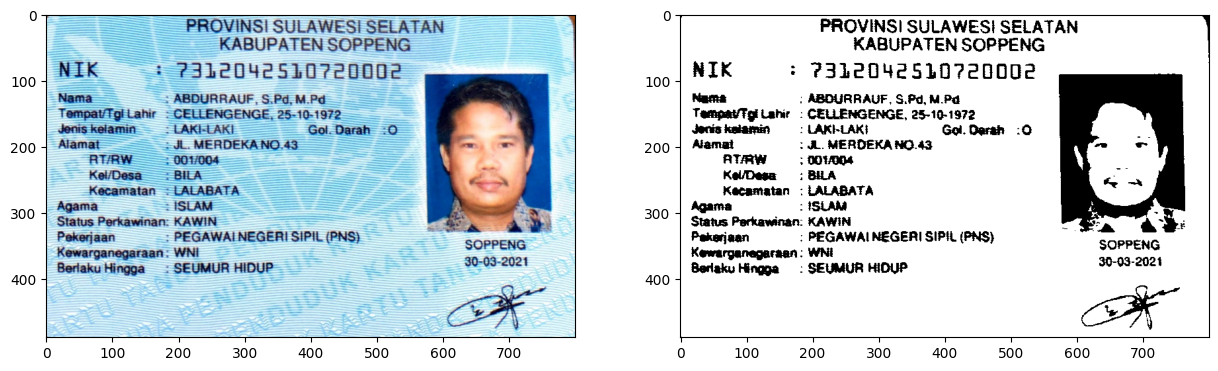

In [66]:
# Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

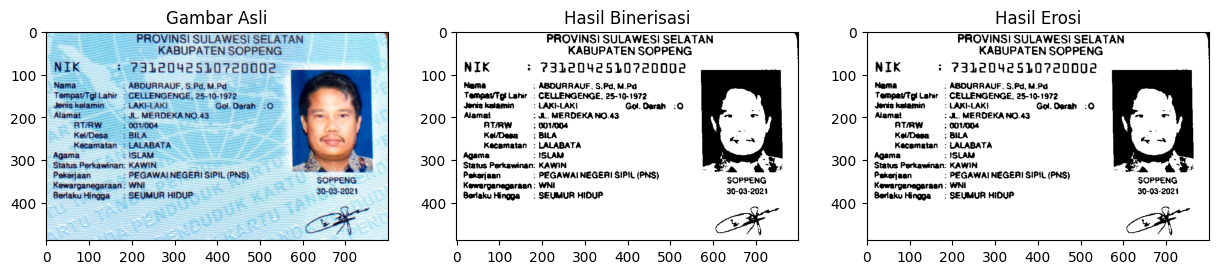

In [67]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

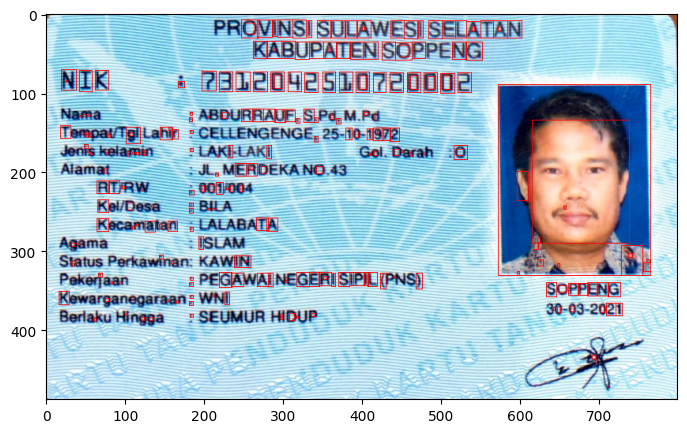

In [68]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

Tugas Praktikum
Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah.

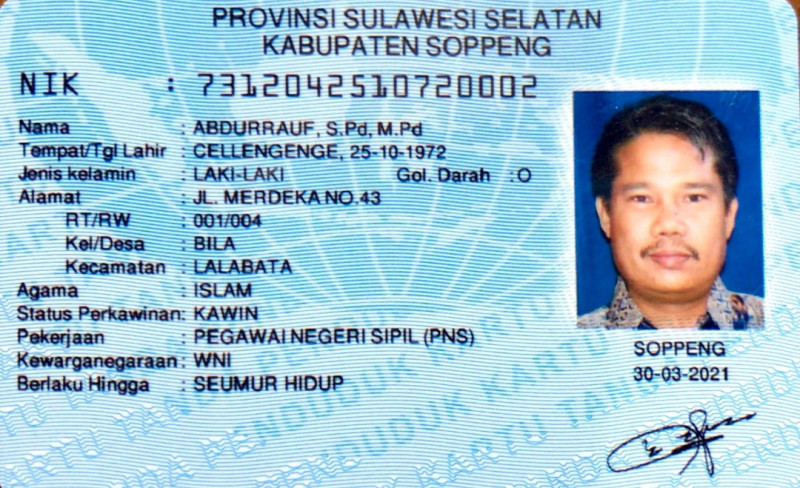

In [69]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')
cv2_imshow(ktp)

In [73]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    # Check if the file is an image file before attempting to read it
    if name_file.endswith(('.jpeg')):  # Add other supported extensions if needed
        src = cv2.imread(os.path.join(path_plate, name_file))

        # Check if the image was loaded successfully
        if src is not None:
            blurred = src.copy()
            gray = blurred.copy()

            # Filtering
            for i in range(10):
                blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

            # ... (rest of your code) ...
        else:
            print(f"Failed to load image: {name_file}")
    else:
        print(f"Skipping non-image file: {name_file}")

Skipping non-image file: .ipynb_checkpoints
Skipping non-image file: animal-template.jpg
Skipping non-image file: animal.jpg
Skipping non-image file: bahrain-template.jpg
Skipping non-image file: bahrain.jpg
Skipping non-image file: balloon.jpg
Skipping non-image file: car-park.jpg
Skipping non-image file: car-park.webp
Skipping non-image file: cat-and-rabbit.jpg
Skipping non-image file: cat-template.jpg
Skipping non-image file: cat2_templatejpg.jpg
Skipping non-image file: cats_and_bunnies.jpg
Skipping non-image file: chess-board.jpg
Skipping non-image file: crossword.jpg
Skipping non-image file: gradient.jpg
Skipping non-image file: j.png
Skipping non-image file: jungle.png
Skipping non-image file: kitten01.jpg
Skipping non-image file: laptop.jpg
Skipping non-image file: lena.jpg
Skipping non-image file: lena_gs_lc.jpg
Skipping non-image file: lena_gs_lc2.jpg
Skipping non-image file: lena_lc.jpg
Skipping non-image file: lily.jpg
Skipping non-image file: noisy2.png
Skipping non-image 

In [74]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

141.0 (488, 800)


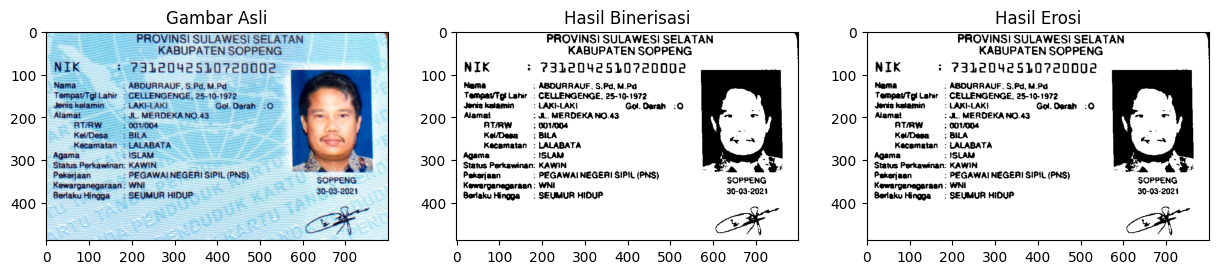

In [75]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

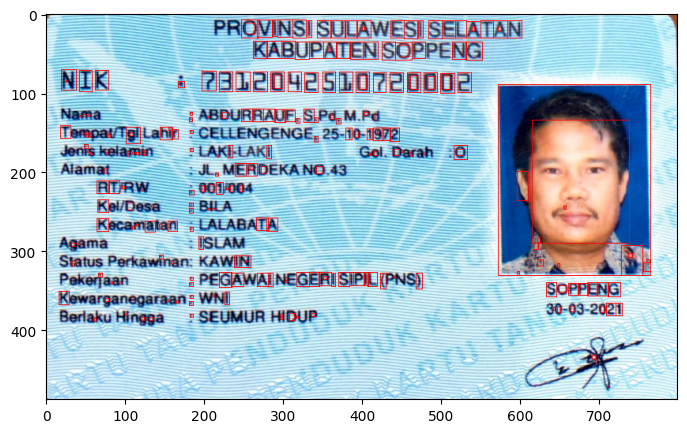

In [76]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))